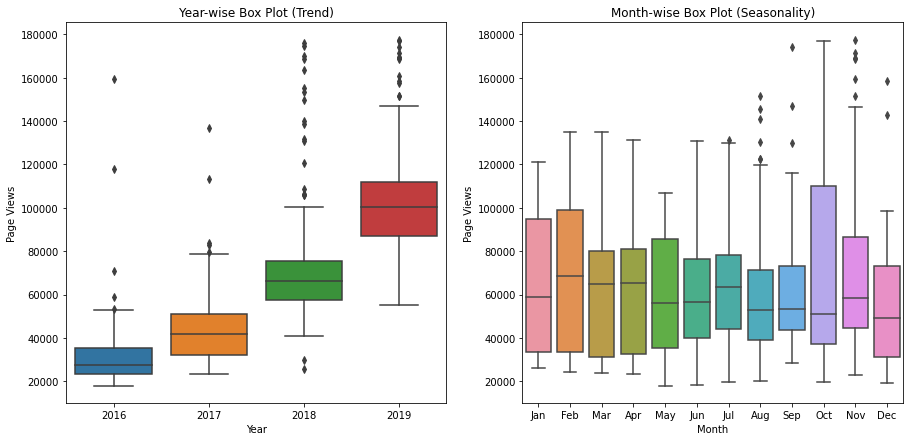

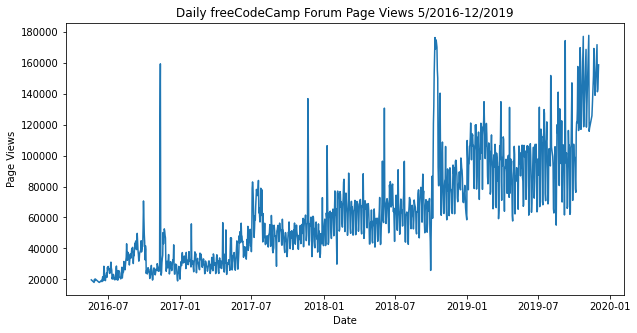

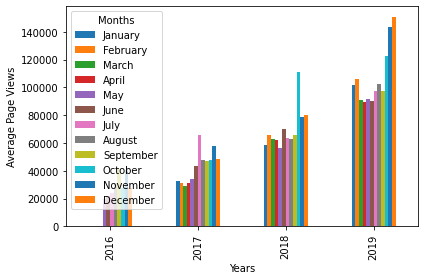

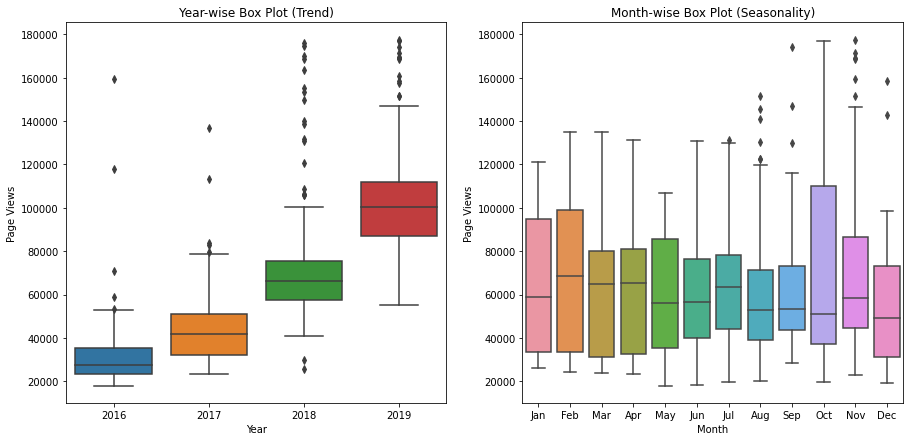

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Import data (Make sure to parse dates. Consider setting index column to 'date'.)

df = pd.read_csv('fcc-forum-pageviews.csv', index_col=0, parse_dates= True)

# Clean data

df = df[(df['value'] >= df['value'].quantile(0.025)) & (df['value'] <= df['value'].quantile(0.975))]

def draw_line_plot():
    # Draw line plot
  
    fig, ax = plt.subplots(figsize=(10,5))
    plt.plot(df.index, df['value'])
    plt.xlabel('Date')
    plt.ylabel('Page Views')
    plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')

    # Save image and return fig (don't change this part)
  
    fig.savefig('line_plot.png')
    return fig

def draw_bar_plot():
    # Copy and modify data for monthly bar plot
  
    df_bar = df.copy()
    df_bar['year'] = pd.DatetimeIndex(df_bar.index).year
    df_bar['month'] = pd.DatetimeIndex(df_bar.index).month
    df_bar = df_bar.groupby(['year', 'month'])['value'].mean().unstack()
  
    # Draw bar plot
  
    fig = df_bar.plot.bar()
    plt.legend(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], title='Months')
    plt.xlabel('Years')
    plt.ylabel('Average Page Views')
    plt.tight_layout()
    fig = fig.figure

    # Save image and return fig (don't change this part)
  
    fig.savefig('bar_plot.png')
    return fig

def draw_box_plot():
    # Prepare data for box plots (this part is done!)
  
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]
    df_box['month_num'] = df_box['date'].dt.month
    df_box = df_box.sort_values('month_num')

    # Draw box plots (using Seaborn)

    fig, ax = plt.subplots(nrows=1, ncols = 2, figsize=(15,7))
  
    sns.boxplot(x='year', y = 'value', data=df_box, ax=ax[0]).set(xlabel='Year', ylabel='Page Views', title='Year-wise Box Plot (Trend)')

    sns.boxplot(x='month', y='value', data=df_box, ax=ax[1], order=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']).set(xlabel='Month', ylabel='Page Views', title='Month-wise Box Plot (Seasonality)')
    
    # Save image and return fig (don't change this part)
  
    fig.savefig('box_plot.png')
    return fig

draw_line_plot()
draw_bar_plot()
draw_box_plot()